In [1]:
import sympy as sp
import numpy as np
from scipy.optimize import root_scalar, fsolve

from parameters import *
from functions import *


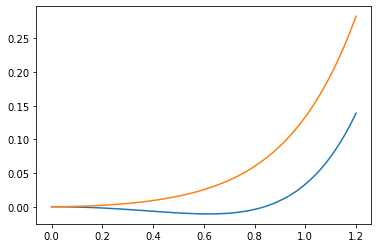

In [38]:
from matplotlib import pyplot as plt
g = lambda x: sp.factorial(x)
f = lambda x, t: t * x**2 / g(2) + x**4 / g(4) + x**6 / g(4)

x = np.linspace(0, 1.2, 100)
plt.plot(x, f(x, -0.1))
plt.plot(x, f(x, +0.1))
plt.show()

In [3]:
F_0_4_diff_mu_symb

-(-2*m**4*mu*sin(a)**2*cos(a)**2/(m**2*cos(a) + mu**2*sin(a)**2) - 4*m**2*mu**3*sin(a)**4*cos(a)/(m**2*cos(a) + mu**2*sin(a)**2) + 2*m**2*mu*(2*l4 - 2*log(m**2*cos(a) + mu**2*sin(a)**2) + 1)*sin(a)**2*cos(a) - 2*mu**5*sin(a)**6/(m**2*cos(a) + mu**2*sin(a)**2) + 4*mu**3*(l1/3 + 2*l2/3 - log(m**2*cos(a) + mu**2*sin(a)**2) + 1/2)*sin(a)**4)/(32*pi**2)

In [4]:
sol = sp.solve(m**2 *(1 - m**2 * l3 / f * 1/(2*(4 * pi)**2))- 1, m)
# MPI * sol[2]
sol

[-7.68240052586871, -1.00858100843922, 1.00858100843922, 7.68240052586871]

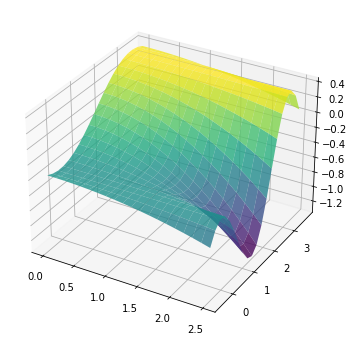

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6, 6))

N = 20
d = 0.5
a = np.linspace(-d, np.pi + d, N)
mu = np.linspace(0, 2.5, N)
MU, A = np.meshgrid(mu, a)
# FLO, FNLO = get_free_energy_surface()

X, Y, Z = MU, A, F_0_2(MU, A)

surf = ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8, zorder=2, lw=0.4)
plt.show()

In [2]:
a0 = alpha_0(mu_list)
np.argmin(np.abs(A[:, :] - a0[None, :]), axis=0)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 10, 14, 17, 19, 21, 23, 24, 26, 27, 28,
       29, 30, 31, 32, 32, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 38,
       39, 39, 39, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43,
       43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45])

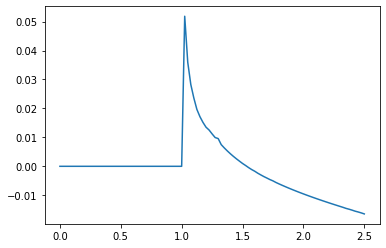

In [5]:
import matplotlib.pyplot as plt
a1 = get_alpha_nlo()
a0 = get_alpha_lo()
plt.plot(mu_list, a1-a0)

In [3]:
A = np.linspace(0, 8, 9).reshape((3, 3))
i = A<5
A[A<5]

array([0., 1., 2., 3., 4.])

In [6]:
alpha_0 = lambda mu: 0 if mu**2<1 else np.arccos(1/mu**2)

m = 2.5
x0 = alpha_0(m) - 0.01

F_0_2(m, x0), F(m, x0)

(-1.3257277800826157, -1.5115824785895469)

4.165925925925926

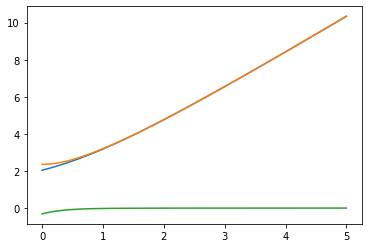

In [11]:
import matplotlib.pyplot as plt
# xs = [50, 100, 200, 300, 400]
# [quad(dF_fin, 0, x, args=(m, x0))[0] for x in xs]


m = 1.8
x0 = alpha_0(m)

Ep2 = lambdify((p, mu, a), Ep_sq)
Em2 = lambdify((p, mu, a), Em_sq)

f1 = lambdify((p, mu, a), sp.sqrt(Em_sq) + sp.sqrt(Ep_sq))

f2 = lambdify((p, mu, a), sp.sqrt(E1_sq) + sp.sqrt(E2_sq))

x = np.linspace(0, 5, 1000)
y = dF_fin(x, m, x0)
plt.plot(x, f1(x, m, x0))
plt.plot(x, f2(x, m, x0))
plt.plot(x, f1(x, m, x0) - f2(x, m, x0))
# plt.plot(x[1::], np.diff(y))
# f1(x[-1], m, x0) #  (f1(x[-1], m, x0) - f2(x[-1], m, x0))

core = lambdify((p, mu, a), (4 * p**2 * m12**2 + M_sq**2 - 4*m1_sq*m2_sq))

core(0, m, x0)
Ep2(0, m, x0)

In [10]:
a0_list = get_alpha_lo()
a1_list = get_alpha_nlo()

a1_list

array([0.        , 0.6216205 , 0.81666288, 0.94718982, 1.03971474,
       1.111224  , 1.16778975, 1.21341289, 1.2509536 , 1.28223155,
       1.30858334])

In [9]:
a1_list

array([0.        , 0.62117803, 0.81695615, 0.9463004 , 1.03971426,
       1.11123212, 1.16772325, 1.21336327, 1.25089642, 1.28216134,
       1.30850223])

In [8]:
a1_list2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.50012574, 0.80030222,
       0.96775759, 1.07881609, 1.15878362, 1.21893876, 1.26556739,
       1.30251899, 1.33231097, 1.35666418, 1.37679487, 1.39358548])

In [34]:
type(a1_list2)
type(a1_list1)


numpy.ndarray

In [20]:
F(mu_list, a0_list)

array([-0.43932977, -0.43932977, -0.43932977, -0.43932977, -0.43932977,
       -0.43932977, -0.43932977, -0.43932977, -0.44336352, -0.47067139,
       -0.5180459 , -0.58161753, -0.65910673, -0.74908489, -0.85059873,
       -0.96296507, -1.08565215, -1.21820775, -1.36021367, -1.51125572])

In [31]:
i = np.where(mu_list>1)
F(mu_list[i], a1_list1[i]) < F(mu_list[i], a0_list[i])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [33]:
F(mu_list[i], a1_list1[i]) < F(mu_list[i], a1_list2[i])

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [35]:
F(mu_list[i], a1_list2[i])

array([-0.44344124, -0.47071425, -0.51806251, -0.58162001, -0.65910759,
       -0.74909673, -0.85063456, -0.96303867, -1.08577847, -1.21840307,
       -1.36049591, -1.51164474])

In [37]:
F(mu_list[i], a1_list1[i]) - F(mu_list[i], a1_list2[i])

array([-1.17585243e-06, -3.48680006e-07, -6.17605966e-11,  3.20747873e-11,
       -6.66453559e-11, -4.92586194e-09, -1.51318047e-09, -1.21356463e-08,
       -3.47262774e-09, -4.68451300e-09, -5.31792632e-09, -7.00524994e-09])

In [40]:
F_diff_a(mu_list[i], a1_list2[i])

array([-3.27989426e-13, -7.54722890e-14,  1.22632373e-13,  4.00926688e-13,
        1.70529672e-07,  2.08427558e-09,  3.15151614e-09, -2.11081968e-09,
        5.37589607e-09,  5.84720931e-09,  2.48644133e-10, -9.96721400e-10])

In [41]:
F_diff_a(mu_list[i], a1_list1[i])

array([ 5.39643853e-04,  4.88184814e-04,  2.32824841e-06, -4.50041484e-07,
       -1.31609441e-06,  2.74317700e-05,  3.16373519e-05,  9.06687545e-05,
        1.10758552e-04,  1.54842983e-04,  1.87208182e-04,  2.12347150e-04])

In [44]:
f = lambda x, *args : lambda args: x + np.sum([y for y in args])
f(1, 2, 3)

<function __main__.<lambda>.<locals>.<lambda>(args)>

In [6]:
%time F(1.2, 1.5)

CPU times: user 44.3 ms, sys: 0 ns, total: 44.3 ms
Wall time: 44.1 ms


-0.34702899858220326